/bin/sh: pip: command not found
/bin/sh: pip: command not found
r2 = 0.997799633272212


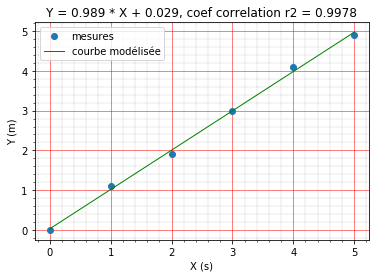

In [6]:
!pip install matplotlib
!pip install scipy
import matplotlib.pyplot as plt

import numpy as np
from scipy.optimize import curve_fit

#--------------------------------------------------
#création des listes de variables utilisées dans le programme
#--------------------------------------------------

X=[0,1,2,3,4,5]
Y=[0.0,1.1,1.9,3.0,4.1,4.9]


#--------------------------------------------------
#partie modélisation
#--------------------------------------------------
#variables utilisées dans la modélisation polynomiale standard
a=0.9
b=0

#mise en place de l'outil curve fit (scipy)
def func(x,a,b):
    return a*x+b

X = np.asarray(X) # conversion des listes en matrices 
Y = np.asarray(Y) # pour pouvoir calculer a*X+b

y = func(X,a,b)

params, mcov =curve_fit(func,X,Y)
# params = coefficients retournés par le calcul de modélisation avec R2 minimal
# mcov = matrice de covariance, permet de quantifier la variation de chaque variable par rapport à chacune des autres
a = params[0]; b=params[1]

#--------------------------------------------------
#partie calcul de r2 coefficient de correlation
#--------------------------------------------------
residuals = Y- func(X, params[0],params[1])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((Y-np.mean(Y))**2)
r_squared = 1 - (ss_res / ss_tot)
print("r2 = " + str(r_squared))

#-------------------------------------------------
#             partie graphique avec quadrillage
#-------------------------------------------------

# label et config des axes
plt.xlabel('X (s)')
plt.ylabel('Y (m)')

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.minorticks_on()
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
# Turn off the display of all ticks.
plt.tick_params(which='both', # Options for both major and minor ticks
                top='False', # turn off top ticks
                left='True', # turn off left ticks
                right='False',  # turn off right ticks
                bottom='True') # turn off bottom ticks

# Plot
plt.plot(X,Y,'o') # nuage de points de l'acquisition
plt.plot(X,func(X,a,b),'g',linewidth=1) # courbe modelisee
equation = "Y = "+str(round(a,3))+" * X + "+str(round(b,3)) + ", coef correlation r2 = " + str(round(r_squared,5))
plt.legend(["mesures","courbe modélisée"])
plt.title(equation)

# modifier les axes APRES avoir positionné les points si besoin de choisir l'echelle
axes = plt.gca()

# affichage
plt.savefig("graphique modelisation.jpg")
plt.show()
